In [50]:
# install main packages

!pip install -q -U pip
!pip install -q -U numpy
!pip install -q -U pandas
!pip install -q -U matplotlib
!pip install -q -U seaborn
!pip install -q -U scikit-learn
!pip install -q -U tensorflow
!pip install -q -U keras

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.0 which is incompatible.


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import max_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


In [52]:
# load dataset
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


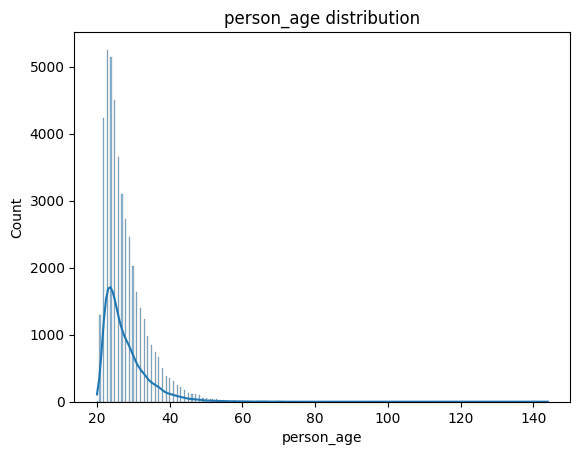

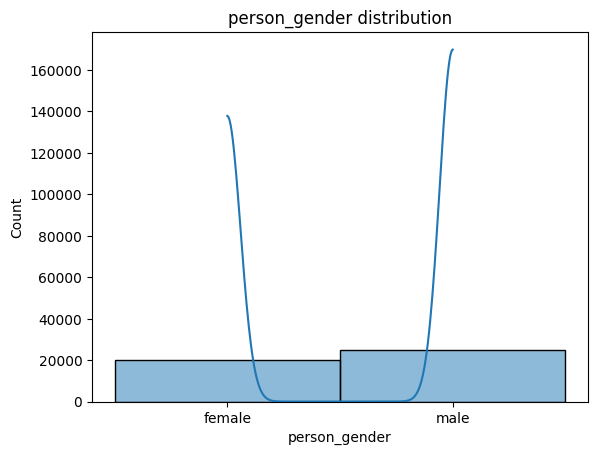

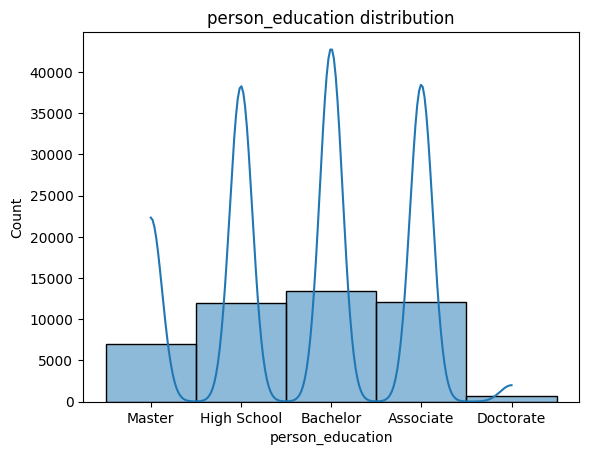

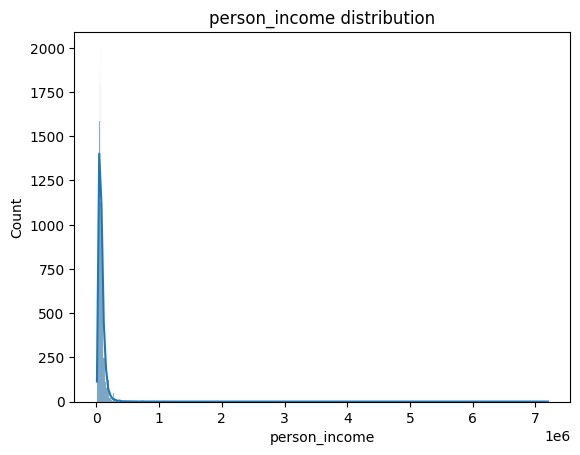

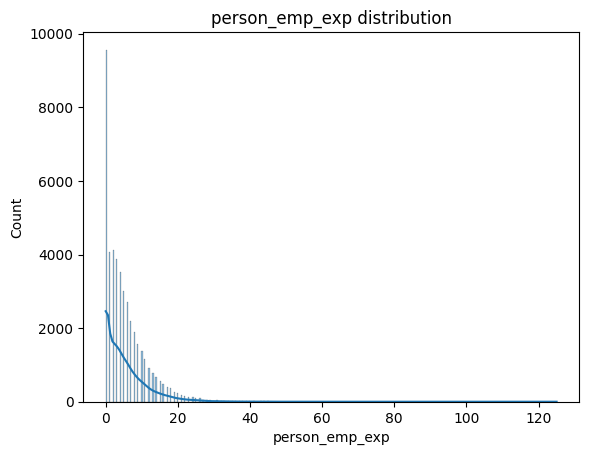

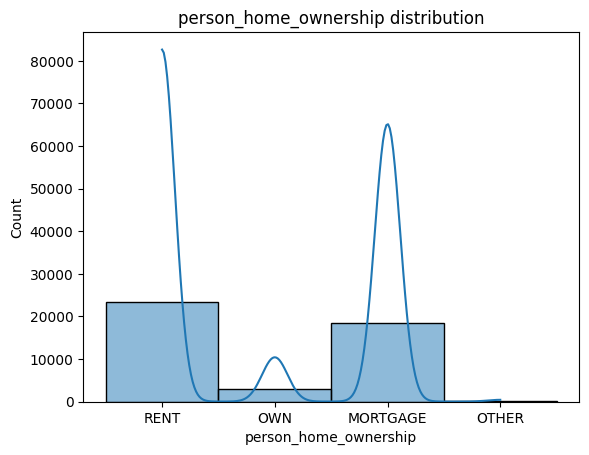

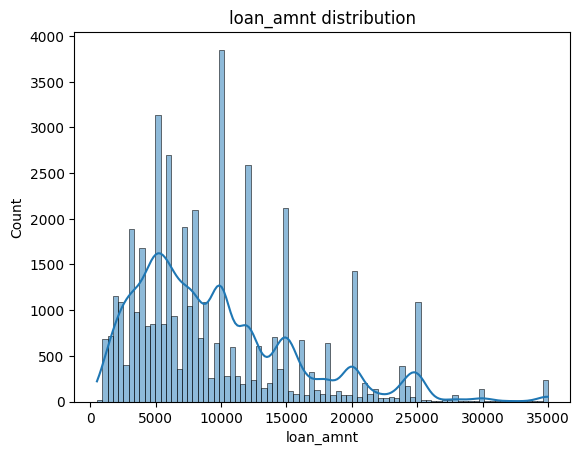

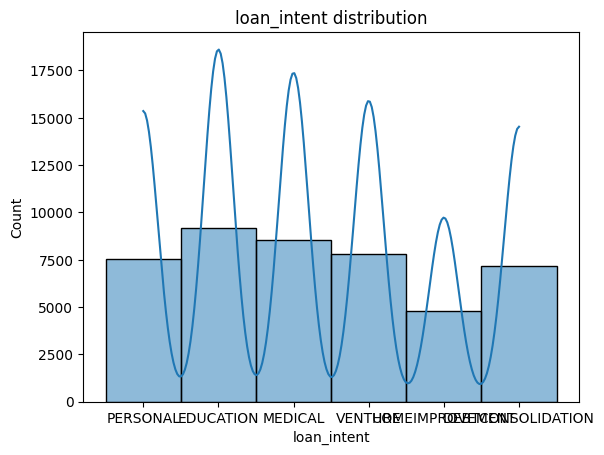

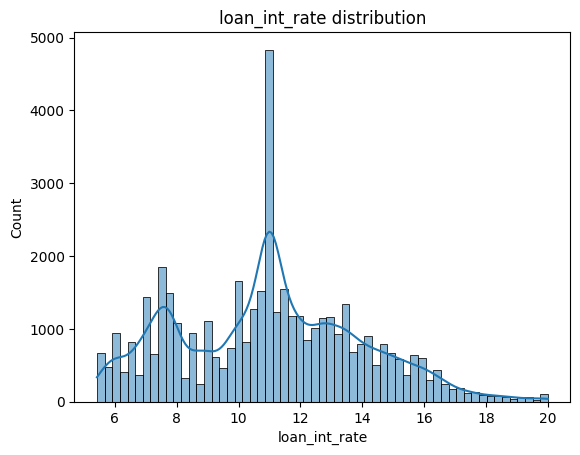

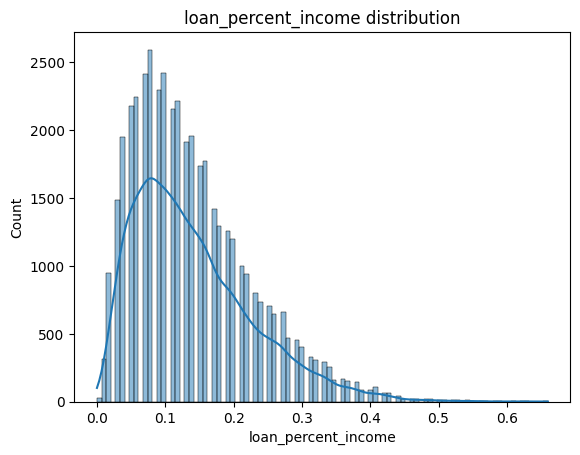

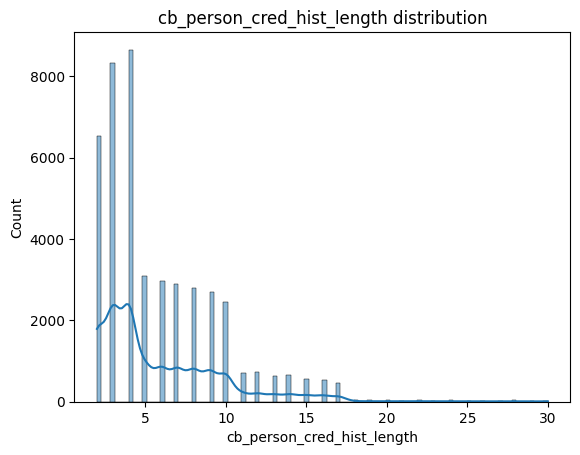

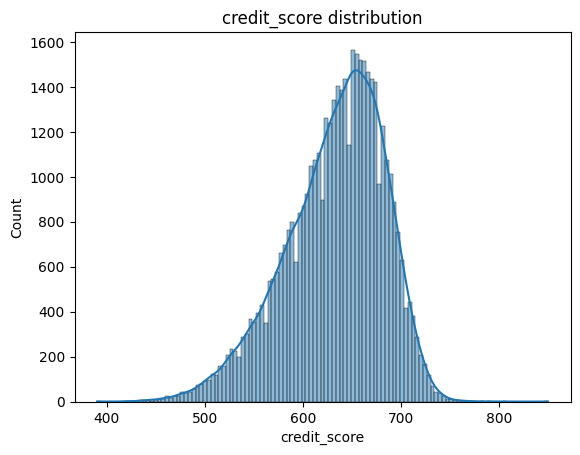

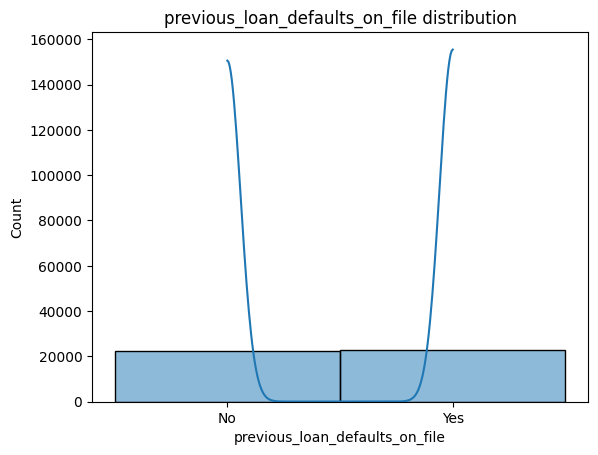

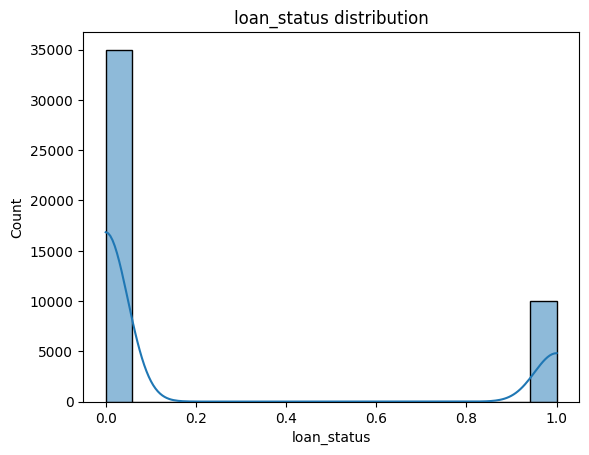

In [53]:
# plot all distributions one by one
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} distribution')
    plt.show()



#### Training Models Without Considering Skewness

In this section, we will train machine learning models on the dataset without addressing the skewness of the data. This will help us understand the impact of skewness on model performance.
Let's proceed with the implementation.


In [54]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [55]:
# Define features and target variable
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 31500
Testing set size: 13500


In [56]:
# transform categorical columns
ordinal_cols = ['person_education', ]
category_cols = ['person_gender', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

# ordinal encoding
label_enc = LabelEncoder()
X_train[ordinal_cols] = X_train[ordinal_cols].apply(label_enc.fit_transform)
X_test[ordinal_cols] = X_test[ordinal_cols].apply(label_enc.fit_transform)

# one-hot encoding
X_train = pd.get_dummies(X_train, columns=category_cols)
X_test = pd.get_dummies(X_test, columns=category_cols)

# Display the first few rows of the dataframe to verify the normalization
X_train.head()

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_female,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
30159,38.0,0,41579.0,14,5750.0,11.01,0.14,16.0,647,False,...,False,True,False,False,False,True,False,False,False,True
6777,24.0,0,28052.0,3,7000.0,10.62,0.25,3.0,649,True,...,False,True,True,False,False,False,False,False,True,False
36563,28.0,0,63722.0,4,7000.0,16.26,0.11,5.0,626,True,...,False,False,False,True,False,False,False,False,False,True
11784,26.0,0,91870.0,3,1200.0,10.25,0.01,2.0,662,False,...,False,False,False,False,False,False,True,False,True,False
10370,22.0,4,29550.0,0,10000.0,11.01,0.34,3.0,633,False,...,False,True,True,False,False,False,False,False,True,False


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=5000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = log_reg.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10493
           1       0.74      0.75      0.75      3007

    accuracy                           0.89     13500
   macro avg       0.84      0.84      0.84     13500
weighted avg       0.89      0.89      0.89     13500



/Users/janithravisanka/Documents/My-personal-projects/Notebooks/loan/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the person_income and loan_amnt columns
X_train[['person_income', 'loan_amnt', 'credit_score']] = scaler.fit_transform(X_train[['person_income', 'loan_amont', 'credit_score']])
X_test[['person_income', 'loan_amnt', 'credit_score']] = scaler.transform(X_test[['person_income', 'loan_amnt', 'credit_score']])

# train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = log_reg.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     10493
           1       0.77      0.75      0.76      3007

    accuracy                           0.89     13500
   macro avg       0.85      0.84      0.85     13500
weighted avg       0.89      0.89      0.89     13500



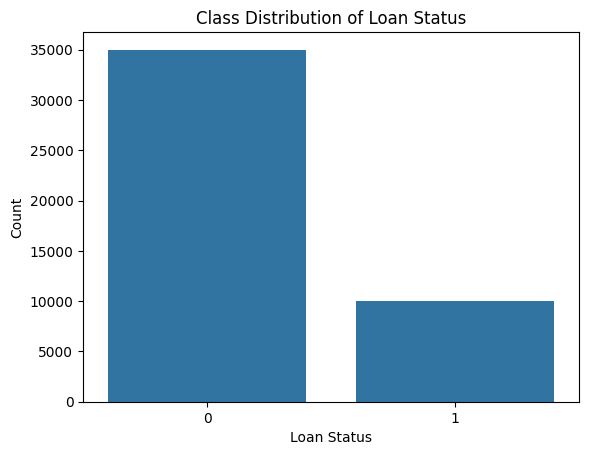

In [59]:
# Plot the class distribution
sns.countplot(x='loan_status', data=df)
plt.title('Class Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [60]:
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the class distribution after resampling
print(y_train_resampled.value_counts())

loan_status
0    24507
1    24507
Name: count, dtype: int64


/Users/janithravisanka/Documents/My-personal-projects/Notebooks/loan/.venv/lib/python3.10/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/janithravisanka/Documents/My-personal-projects/Notebooks/loan/.venv/lib/python3.10/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [61]:
# Train the logistic regression model on the resampled data
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_resampled = log_reg.predict(X_test)

# Evaluate the model
accuracy_resampled = log_reg.score(X_test, y_test)
print(f"Accuracy after resampling: {accuracy_resampled:.2f}")

# Print classification report
print(classification_report(y_test, y_pred_resampled))

Accuracy after resampling: 0.88
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     10493
           1       0.70      0.84      0.76      3007

    accuracy                           0.88     13500
   macro avg       0.83      0.87      0.84     13500
weighted avg       0.90      0.88      0.89     13500



Epoch 1/100


/Users/janithravisanka/Documents/My-personal-projects/Notebooks/loan/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1226/1226 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.7746 - loss: 0.5276 - val_accuracy: 0.9628 - val_loss: 0.1698
Epoch 2/100
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step - accuracy: 0.8715 - loss: 0.2664 - val_accuracy: 0.9330 - val_loss: 0.2142
Epoch 3/100
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.8868 - loss: 0.2448 - val_accuracy: 0.9517 - val_loss: 0.1695
Epoch 4/100
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.8925 - loss: 0.2322 - val_accuracy: 0.9758 - val_loss: 0.1032
Epoch 5/100
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - accuracy: 0.8964 - loss: 0.2222 - val_accuracy: 0.9526 - val_loss: 0.1483
Epoch 6/100
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - accuracy: 0.8981 - loss: 0.2189 - val_accuracy: 0.9344 - val_loss: 0.1834
Epoch 7/100
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - accuracy: 0.9025 - loss: 0.2120 - val_accuracy: 0.9754 - val_loss: 0.0940
Epoch 8/100
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - accuracy: 0.9053 - los

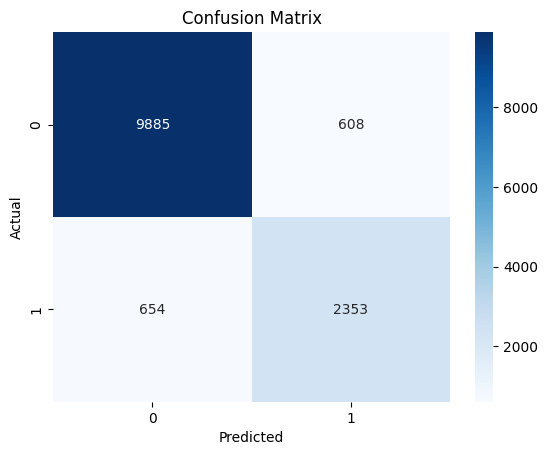

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Convert the target variable to categorical
# y_train_resampled_categorical = to_categorical(y_train_resampled)
# y_test_categorical = to_categorical(y_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_resampled, y_train_resampled_categorical, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print(f"Neural Network Accuracy: {accuracy:.2f}")

# Make predictions
y_pred_nn = model.predict(X_test)
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_nn_classes))

# Calculate the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred_nn_classes, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


#### Addressing Skewness

In this section, we will address the skewness in the dataset to improve the performance of our machine learning models. Skewness can affect the accuracy and generalization of the models, so it is important to handle it appropriately. Let's proceed with the implementation.
